<a href="https://colab.research.google.com/github/Asif12as/SQL_assessment/blob/main/Autism_Diagnosis_Minor_Project_Batch_03_(ASD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

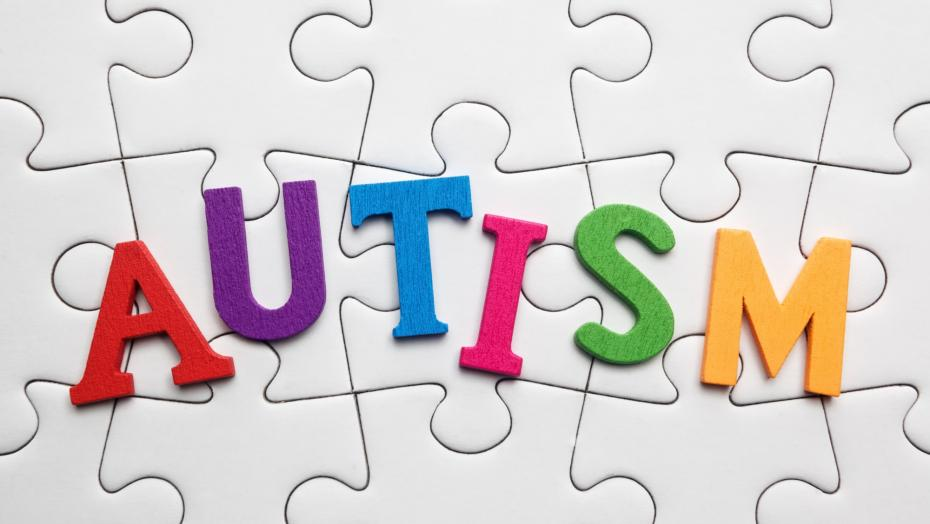

In [ ]:
from IPython.display import Image
import os

Image('/content/autism.jpg')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import enum
import math
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, roc_auc_score
from sklearn.metrics import roc_auc_score
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
PATH = '../input/autism-prediction/Autism-prediction'
train_data = pd.read_csv(os.path.join(PATH, '/content/train.csv'))
test_data = pd.read_csv(os.path.join(PATH, '/content/test.csv'))
final_data = pd.read_csv(os.path.join(PATH, '/content/sample_submission.csv'))

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
train_data.info()

In [ ]:
train_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [ ]:
train_data.drop_duplicates(inplace=True)
train_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
test_data.drop_duplicates(inplace=True)
test_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,1,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,0,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,1,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,0,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,0,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [ ]:
def feature_count(data):
    # missing values
    total_missing_values = data.isnull().sum().sort_values(ascending = False)
    percent_missing_values = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing_values = pd.concat([total_missing_values, percent_missing_values], axis=1, keys=['Total', 'Percent'])

    #unique values
    total_data = data.count()
    total_unique_values = pd.DataFrame(total_data)
    total_unique_values.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    total_unique_values['Uniques'] = uniques
    unique = total_unique_values
    return pd.concat([missing, unique], axis=1, keys=['Missing', 'UNIQUE'])

In [ ]:
def cat_num(data):
    num = list(data._get_numeric_data().columns)
    cat = [cat for cat in  data.columns if cat not in (num)]
    print(f"numerical features : {num}\ntotal numerical : {len(num)}\n\ncategorical features : {cat}\n total categorical: {len(cat)}")
    return cat , num
train_cat , train_num =cat_num(train_data)

numerical features : ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
total numerical : 14

categorical features : ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']
 total categorical: 8


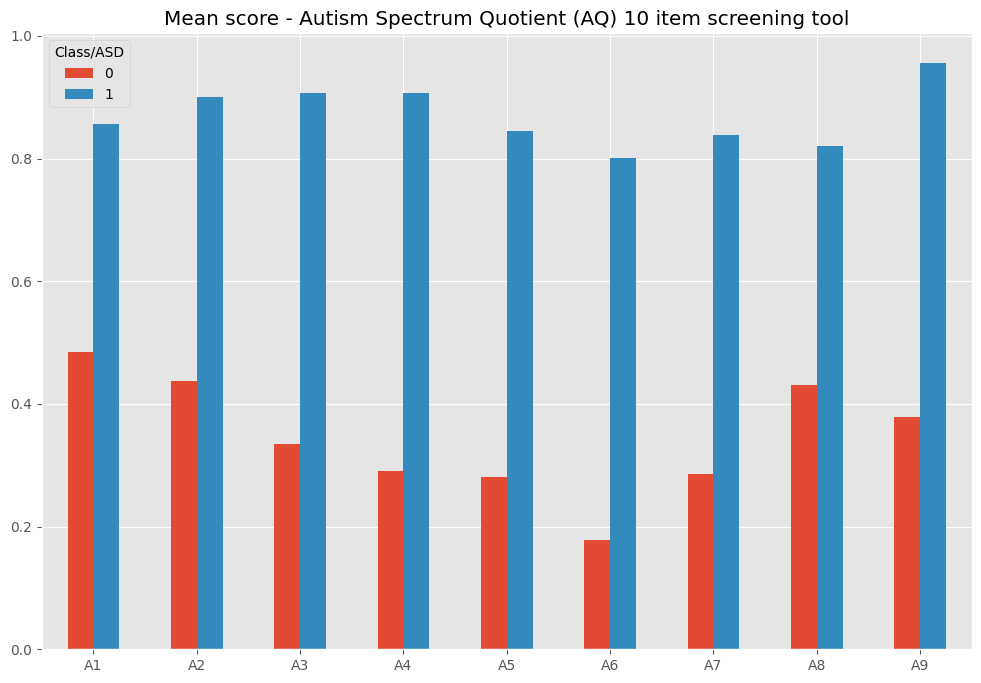

In [ ]:
# Visualization of A_Score Feature

score_features = train_data.filter(regex='A[0-9]_', axis=1).columns.tolist()
train_data.groupby('Class/ASD')[score_features].mean().T.plot.bar()
plt.title('Mean score - Autism Spectrum Quotient (AQ) 10 item screening tool')
plt.xticks(ticks=range(len(score_features)), labels=[x.split('_')[0] for x in score_features], rotation=0);

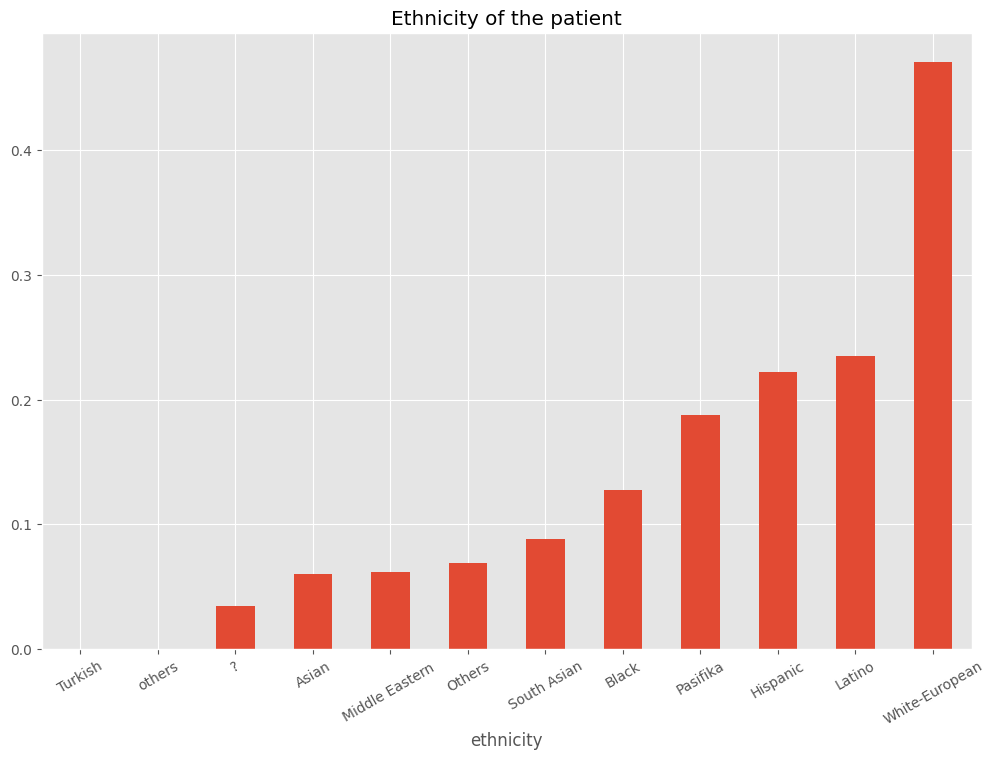

In [ ]:
#Visualization of Ethnicity of the patient

train_data.groupby('ethnicity')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('Ethnicity of the patient')
plt.xticks(rotation=30);

<Axes: xlabel='gender', ylabel='age'>

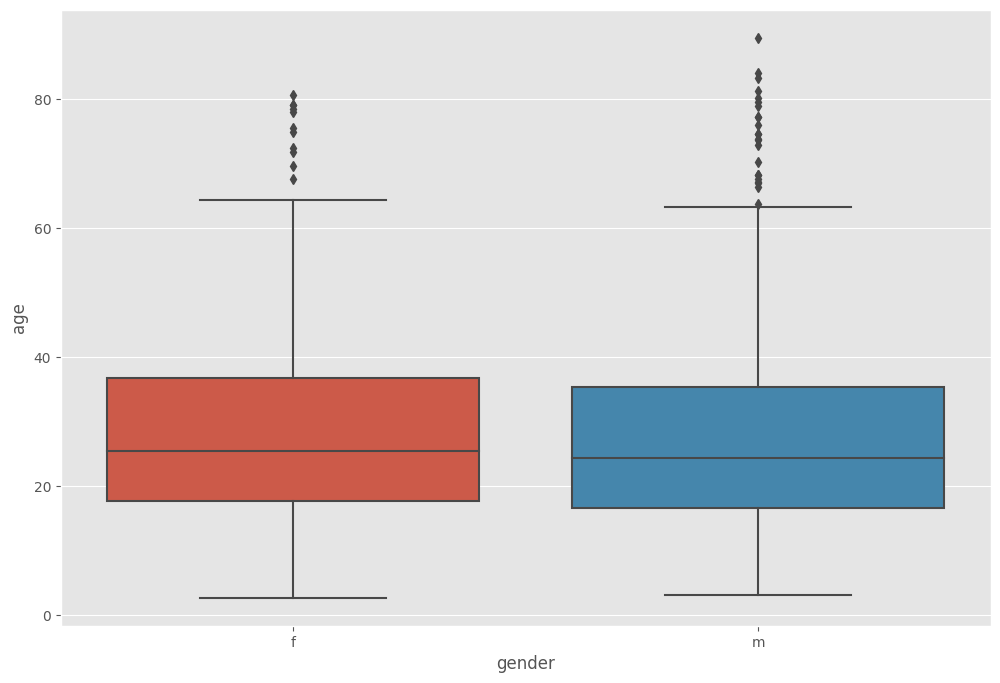

In [ ]:
#Visualization of boxplot of age vs gender

sns.boxplot(y=train_data.age,x=train_data.gender,data=train_data)

In [ ]:
train_data['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
#Visualization of country of residence of the patient - Treemap

fig = px.treemap(train_data, path=['contry_of_res','Class/ASD'], color='Class/ASD',
                 color_continuous_scale='plotly3',
)

fig.update_layout(title="<b> COUNTRY OF RESIDENCE OF THE PATIENT - TREEMAP <b>",
                  titlefont={'size': 20, 'family': "San Serif"},
                  height=500, width=1000,
                  template='simple_white',
                  autosize=False,
                  margin=dict(l=50,r=50,b=50, t=250,
                             ),
                 )
fig.update_layout(margin = dict(t=50, l=50, r=50, b=100))
fig.show()

In [ ]:
#Visualization of country of residence of the patient - Histogram

fig = px.histogram(train_data, x="contry_of_res",
                   width=900,
                   height=400,
                   histnorm='percent',
                   template="simple_white")
fig.update_layout(title="<b> COUNTRY OF RESIDENCE OF THE PATIENT - HISTOGRAM <b>",
                  font_family="San Serif",
                  titlefont={'size': 20},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )
                 ).update_xaxes(categoryorder='total descending')

colors = ['purple',] * 100
colors[0] = 'purple'

fig.update_traces(marker_color=colors,
                 ).update_xaxes(categoryorder='total descending')

fig.show()


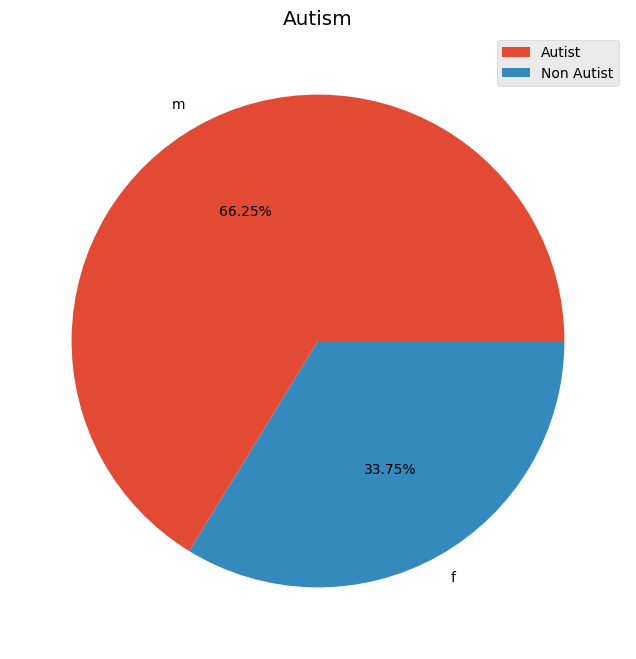

In [ ]:
train_data['gender'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Autism')
plt.legend(['Autist','Non Autist'])

Text(0.5, 1.0, ' Autism by jaundice ')

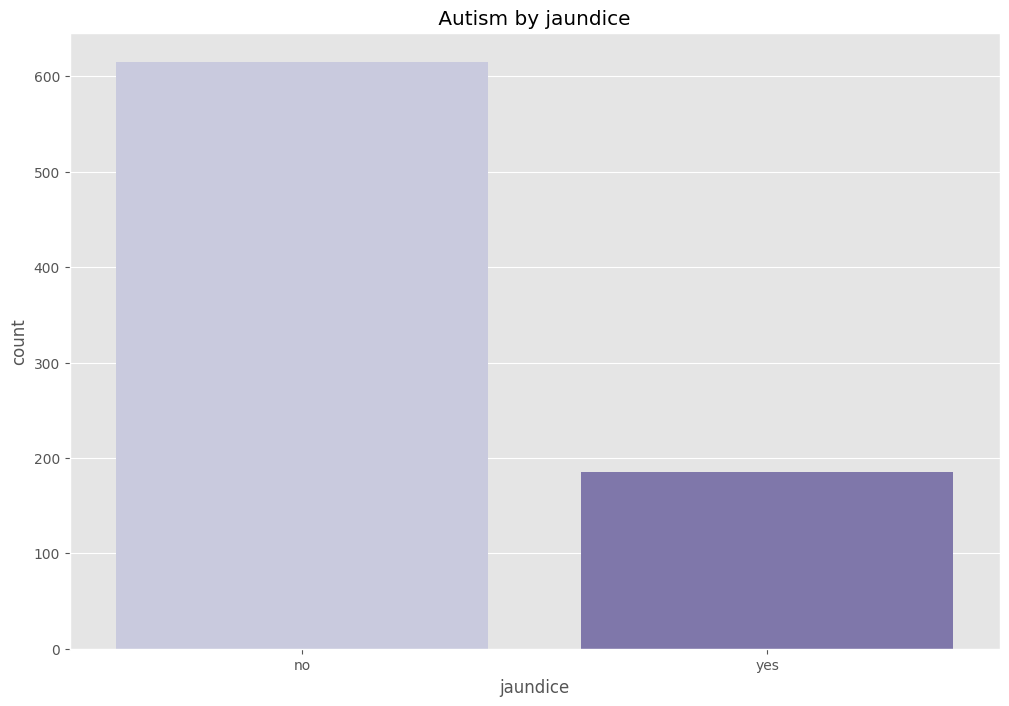

In [ ]:
#Visualization of Autism by jaundice

sns.countplot(x="jaundice",data=train_data,palette="Purples")
plt.title(' Autism by jaundice ')

In [ ]:
train_data.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

Text(0.5, 1.0, 'Autism by screening test')

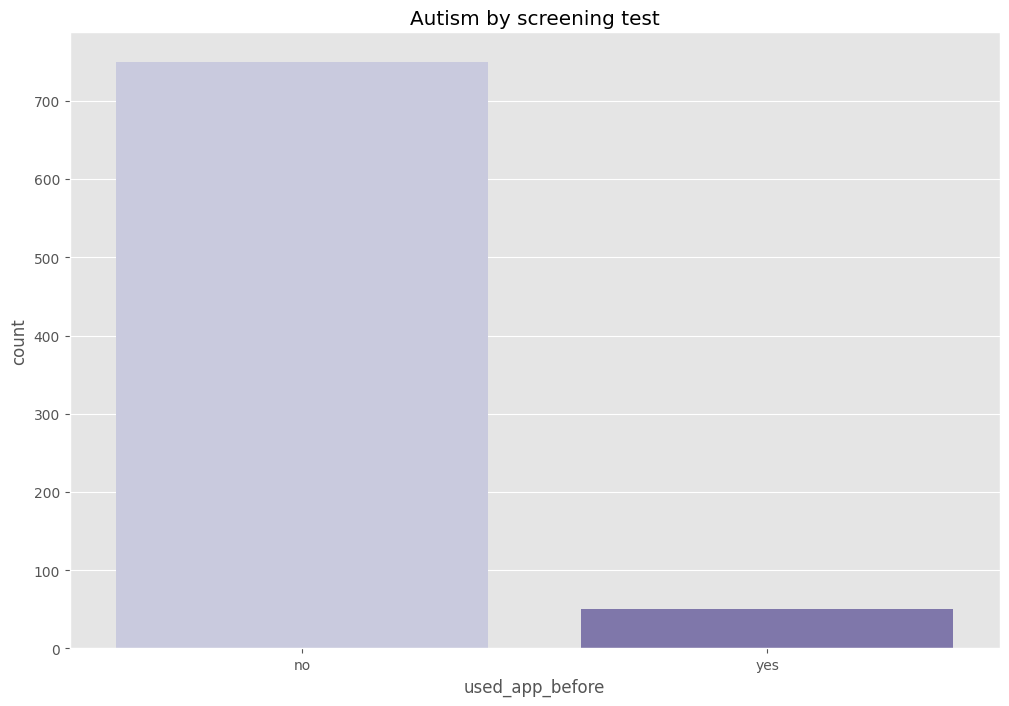

In [ ]:
#Visualization of Autism by screening test

sns.countplot(x="used_app_before",data=train_data,palette="Purples")
plt.title('Autism by screening test')

In [ ]:
features = [
    'age',
    'jaundice',
    'austim',
    'result'
]

metr = []
df = test_data[['ID']].copy()

n_splits = 20
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
for fold, (tr, val) in enumerate(kfold.split(train_data[features], train_data['Class/ASD'])):
    print('FOLD:', fold)

    ## SPLIT THE DATA ##
    X_train = train_data.loc[tr, features]
    y_train = train_data.loc[tr, 'Class/ASD']
    X_val = train_data.loc[val, features]
    y_val = train_data.loc[val, 'Class/ASD']
    X_test = test_data[features]

    ## DEFINE THE MODEL ##
    model = LogisticRegression(
        random_state=1
    )
    # FIT THE DATA
    model.fit(X_train, y_train)

    ####### GET THE PREDICTIONS #######

    ## PREDICT THE DATA ##
    prediction = model.predict(X_val)
    probability = model.predict_proba(X_val)[:, 1]

    ## PREDICTION ON TEST SET ##
    df[f'fold_{fold}'] = model.predict_proba(X_test)[:, 1]

    ## METRICS ##
    report = metrics.classification_report(y_val, prediction)
    roc_auc_score = metrics.roc_auc_score(y_val, probability)
    metr.append(roc_auc_score)
    print(report)
    print('AUC:', roc_auc_score)
    print()

print('-' * 30)
print('Mean:', np.mean(metr))
print('Std:', np.std(metr))

FOLD: 0
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.50      0.38      0.43         8

    accuracy                           0.80        40
   macro avg       0.68      0.64      0.65        40
weighted avg       0.78      0.80      0.79        40

AUC: 0.77734375

FOLD: 1
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.25      0.40         8

    accuracy                           0.85        40
   macro avg       0.92      0.62      0.66        40
weighted avg       0.87      0.85      0.81        40

AUC: 0.7109375

FOLD: 2
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.50      0.38      0.43         8

    accuracy                           0.80        40
   macro avg       0.68      0.64      0.65        40
weighted avg     

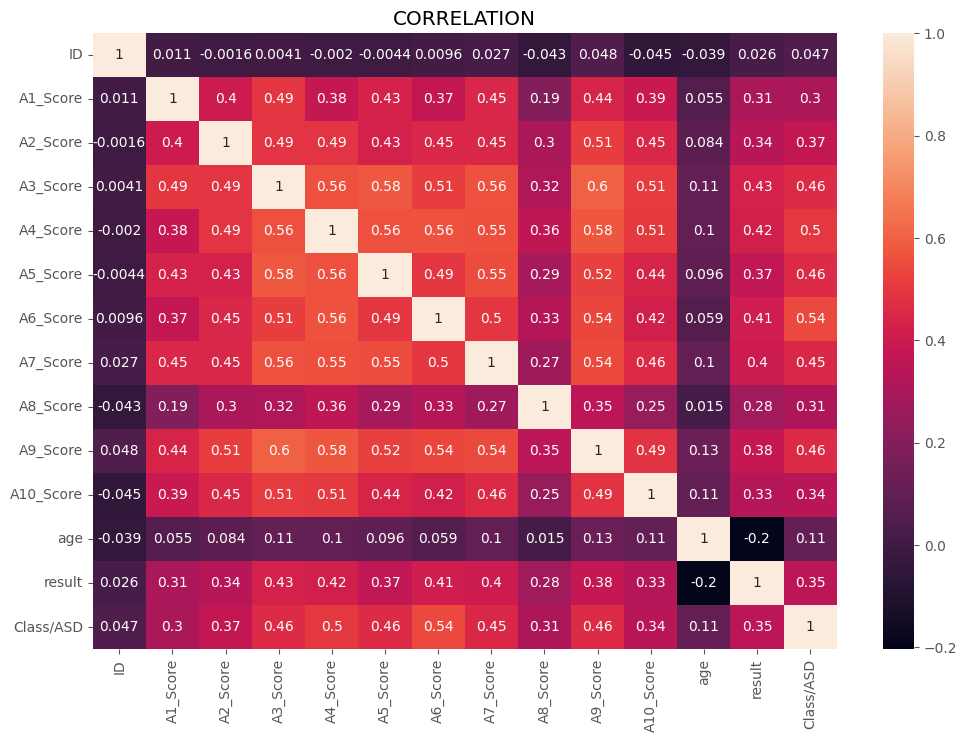

In [ ]:
#finding correlation between variables and output using heatmap
plt.figure(figsize=(12,8))

sns.heatmap(train_data.corr(), annot=True)
plt.title("CORRELATION")
plt.show()

In [ ]:
train_data.corr()['Class/ASD'].sort_values(ascending=False)[1:]

A6_Score     0.543010
A4_Score     0.501046
A9_Score     0.463347
A5_Score     0.461773
A3_Score     0.460927
A7_Score     0.452338
A2_Score     0.372740
result       0.351906
A10_Score    0.343736
A8_Score     0.312388
A1_Score     0.300474
age          0.109859
ID           0.047149
Name: Class/ASD, dtype: float64

In [ ]:
# binary encoding

binary_map = {'no': 0, 'yes': 1}
train_data['jaundice'] = train_data['jaundice'].map(binary_map)
train_data['austim'] = train_data['austim'].map(binary_map)
test_data['jaundice'] = test_data['jaundice'].map(binary_map)
test_data['austim'] = test_data['austim'].map(binary_map)

Logistic Regression has the highest accuracy score (94.92%)

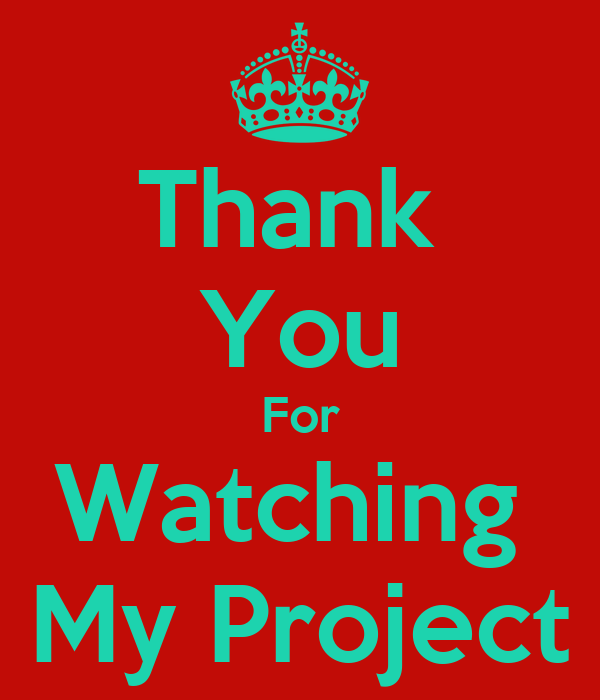

In [ ]:
from IPython.display import Image
import os

Image('/content/Thank you.png')